# 1. Класи задач, що розв’язують НМ.

- Класифікація
- Регресія
- Локалізація (знахождення) об'єкта на зображенні
- Семантична сегментація
- Генерація (за допомогою GAN; приклад: покращення якості зображення)
- Переклад тексту

# 2. Етапи побудови проекту з НМ

1. Підготовка даних   
    a. Збір даних  
    b. Передобробка даних  
    c. Розбиття на тренувальну, валідаційну та тестову вибірки (за необхідності)
2. Побудова моделі/моделей (вибір типів шарів, їх розмірності, кількості і т.д.)
3. Обрання функції похибки, алгоритму оптимізації ваг та метрик якості роботи мережі  
3. Тренування моделі  
4. Оцінка якості роботи моделі


# 3. Функція завантаження навчаючої та тестової вибірки. Детально на прикладі.

  У деяких датасетах тренувальна та тестові вибірки визначені заздалегідь

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(f'Розмрність ТРЕНУВАЛЬНОЇ вибірки: дані - {X_train.shape}, мітки - {y_train.shape}')
print(f'Розмрність ТЕСТОВОЇ вибірки: дані - {X_test.shape},  мітки - {y_test.shape}')

Розмрність ТРЕНУВАЛЬНОЇ вибірки: дані - (60000, 28, 28), мітки - (60000,)
Розмрність ТЕСТОВОЇ вибірки: дані - (10000, 28, 28),  мітки - (10000,)


Для власного датасету можна самостійно визначити алгоритм розбиття на тренувальну та тестову або скористатися функцією розбиття випадковим чином (питання 4)

# 4.1. Дослідження даних. Основні функції.

Для прикладів використаємо наступний датасет

In [ ]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

Перед початком дослідження даних можна оцінити їх на прикладі кількох семплів

In [ ]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Для дослідження даних можна використовувати статистичні функції: середнє, стандартне відхилення, мода, квантилі

In [ ]:
iris.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Також можна побудувати графік для певної властивості

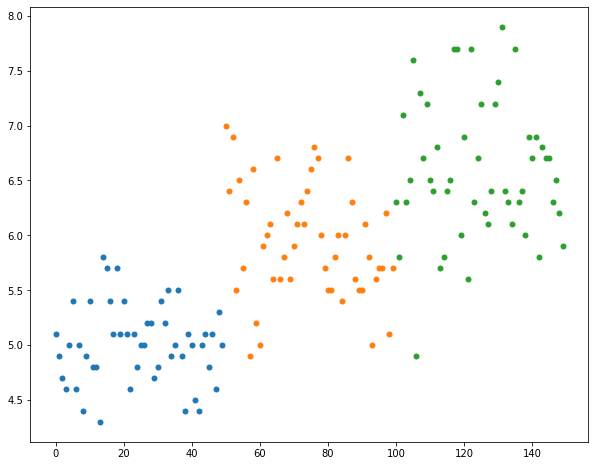

In [ ]:
import matplotlib.pyplot as plt

_ = plt.figure(figsize=(10, 8))

combined_data = iris.data.copy()
combined_data['target'] = iris.target
for _, cls_data in combined_data.groupby('target'):
    _ = cls_data['sepal length (cm)'].plot(style='.', markersize=10)

# 4.2. Розбиття даних на перевірочні та тестові.

Для розбиття даних можна використати наступну функцію

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

print(f'Розмрність ТРЕНУВАЛЬНОЇ вибірки: дані - {X_train.shape}, мітки - {y_train.shape}')
print(f'Розмрність ТЕСТОВОЇ вибірки: дані - {X_test.shape},  мітки - {y_test.shape}')

Розмрність ТРЕНУВАЛЬНОЇ вибірки: дані - (105, 4), мітки - (105,)
Розмрність ТЕСТОВОЇ вибірки: дані - (45, 4),  мітки - (45,)


# 5. Оцінка якості роботи НМ.

Для оцінки якості роботи моделі користуються метриками  
Для задач класифікації: 
- $точність(accuracy)$
- $влучність(precision)$ 
- $повнота(recall)$  
- $f_1 score$  
- $f_\beta score$  

Для задач регресії: 
- $Коефіцієнт\ детермінації(R^2)$
- $Середньоквадратична\ похибка$  

Наведено поширені метрики, також можна використовувати власні метрики

Якщо значення метрик на тренувальній вибірці незадовільні, то кажуть, що НМ недовчилася (underfitting).  
Якщо значення метрик на тренувальній та тестовій вибірках суттєво відрізняються, наприклад 0.95 та 0.75 точність відповідно, то кажуть що НМ перетренувалася (overfitting)  
Якщо значення метрик тренувальній та тестовій вибірках задовільні, наприклад 0.95 та 0.9 точність відповідно, то можна казати, що навчання НМ пройшло успішно і вона якісно виконує задачу


# 6. Обрати текст (книгу) з ресурсу запропонованого на лекції. Підготувати його до використання.

Обрано частину книги
[***Animal Life in Field and Garden***](https://www.gutenberg.org/ebooks/66755):

*Chapter I*  
*What Uncle Paul Proposes To Talk About*

In [ ]:
TEXT = """
“In these talks that we shall have together,” said Uncle Paul, as he
sat with his nephews one evening in May under the big elder tree in the
garden, “I propose to designate as ‘friends’ those forms of animal life
that, though not domesticated or cared for by us, nevertheless come to
our aid by waging war on insects and various other devouring creatures
which would in the end, unless their excessive multiplication were kept
in restraint by others besides ourselves, eat up all our crops and lay
waste our fields; and it is these ravagers of the farmer’s carefully
tilled acres that I shall speak of as ‘foes.’

“What can man’s efforts avail against those voracious hordes,
multiplying as they do every year to an extent beyond calculation? Will
he have the patience, the skill, the keenness of vision necessary for
waging successful warfare on the tiniest species, often the most
formidable, when the June-bug, despite its far greater size, baffles
all his endeavors? Will he undertake to examine his fields and inspect
every lump of soil, every spear of wheat, every separate leaf on his
fruit-trees? For so prodigious a task the whole human race would be
inadequate, even if it united all its efforts to this one end. The
devouring hordes would reduce us to starvation, my children, had we not
able helpers to work for us, helpers endowed with a patience that
nothing can tire, a skill that foils all ruses, a vigilance that
nothing escapes. To lie in ambush for the enemy, to track it to its
remotest retreats, to hunt it unceasingly, and finally to exterminate
it—that is their sole care, their never-ending occupation. Urged on by
the pangs of hunger, they are relentless in their pursuit, both for
their own sake and on behalf of their progeny. They live on those that
live on us; they are the enemies of our enemies.

“Engaged in this work are the martins that just at present are circling
over our heads, the bats that fly around our house, the owls that call
to one another from the hollow willow trunks in the meadow, the
warblers that sing in the grove, the frogs that croak in the ditches,
and many more besides, including the toad, which is an object of
loathing to most people. Thanks be to God who has given us, to serve as
guardians of our daily bread, the owl and the toad, the bat and the
viper, the frog and the lizard! All these creatures, wrongfully cursed
and shamefully abused by us, and foolishly looked upon with repugnance
and hatred, in reality lend us valiant assistance and should take a
high place in our esteem. To repair the injustice they have suffered
shall be my first duty as we come to each of them in turn. Thanks be to
God who, to protect us from that great eater the insect, has given us
the swallow and the warbler, the robin redbreast and the nightingale!
These, the delight of our eye and ear, creatures of infinite grace—must
I again raise my voice in their defense? Alas, yes, for their homes are
ravaged by the barbarous nest-hunter.

“It is my purpose now to acquaint you, my children, with these various
helpers of man in his labors as tiller of the soil. I will tell you
about their ways of living, their habits and their aptitudes, and the
services they render us. My object will be attained if I succeed in
imparting to you a little of the interest they deserve. I will begin
with those that have teeth. But first let us take a glance at the shape
and structure of teeth in general; for it is this that determines the
kind of food required by the animal.”
""".translate(str.maketrans({'\n': ' ', '‘': "'", '’': "'", '“': '"', '”': '"'})).strip()

# 7. Обрати 10 речень. Визначити емоційне забарвлення тексту та окремо речень. Зробити висновки.

In [ ]:
from textblob import TextBlob, WordList
import nltk
from nltk.corpus import stopwords

for data in ('punkt',):
    nltk.download(data)

blob = TextBlob(TEXT)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
blob.sentiment

Sentiment(polarity=0.1663217703349282, subjectivity=0.5370175438596491)

In [ ]:
import pandas as pd

import random

random.seed(0)
sentences = random.sample(blob.sentences, 10)

polarity_list, subjectivity_list = [], []
for sentence in sentences:
    polarity, subjectivity = sentence.sentiment
    polarity_list.append(polarity)
    subjectivity_list.append(subjectivity)


sent_sentiment = pd.DataFrame({'sentence': [sentence.string for sentence in sentences], 'polarity': polarity_list, 'subjectivity': subjectivity_list})
sent_sentiment

,sentence,polarity,subjectivity
0,To repair the injustice they have suffered sha...,0.250000,0.333333
1,"Thanks be to God who, to protect us from that ...",0.600000,0.475000
2,"""What can man's efforts avail against those vo...",0.000000,0.000000
3,They live on those that live on us; they are t...,0.136364,0.500000
4,"""It is my purpose now to acquaint you, my chil...",0.000000,0.500000
5,"Alas, yes, for their homes are ravaged by the ...",-0.200000,0.950000
6,"To lie in ambush for the enemy, to track it to...",0.000000,0.625000
7,But first let us take a glance at the shape an...,0.300000,0.577778
8,For so prodigious a task the whole human race ...,0.100000,0.250000
9,"Urged on by the pangs of hunger, they are rele...",0.600000,1.000000


In [ ]:
sent_sentiment.describe()

,polarity,subjectivity
count,10.000000,10.000000
mean,0.178636,0.521111
std,0.262887,0.300115
min,-0.200000,0.000000
25%,0.000000,0.368750
50%,0.118182,0.500000
75%,0.287500,0.613194
max,0.600000,1.000000


Емоційне забарвлення тексту обраних речень та тексту майже не відрізняються.

Хоча в тексті і наявні речення як частково негативного забарвлення (-0.2) так і позитивного (0.6), але у середньому маємо показники polarity=0.18 та subjectivity=0.52, що є близьким до показників усього тексту (0.17 та 0.54 відповіно). 

Треба зауважити, що в даному випадку текст складається всього з 21 речення. Для тексту більшого розміру емоційне забарвлення випадково обраних 10 речень може істотно відрізнятися в забарвлення тексту.

# 8. В текстовому описі вказати слова з помилками. Ввести в текст їх самостійно. Визначити ймовірність можливого виправлення помилок в цих словах(реченнях).

In [ ]:
misspelled_words = {}

def misspelled_word(misspelled_word, correct_word):
    if misspelled_word == correct_word:
        raise ValueError('Passed same words, first word should be misspelling and second should be correct option')

    misspelled_words[misspelled_word] = correct_word
    return misspelled_word


DESCRIPTION = f"""
The {misspelled_word('Projct', 'Project')} Gutenberg eBook of {misspelled_word('Anmal', 'Animal')} Life in Field and Garden, by
Jean-Henri Fabre

This eBook is for the {misspelled_word('yse', 'use')} of {misspelled_word('anone', 'anyone')} anywhere in the United States and
most {misspelled_word('othr', 'other')} parts of the world at no cost and with almost no restrictions
whatsoever. You may {misspelled_word('copppy', 'copy')} it, give it away or re-use it under the terms
of the Project Gutenberg {misspelled_word('Laicense', 'License')} included {misspelled_word('witj', 'with')} this eBook or online at
www.gutenberg.org. If you are not {misspelled_word('locatd', 'located')} in the United States, you
will {misspelled_word('hav', 'have')} to check the laws of the country where you are located before
using this eBook.""".replace('\n', ' ').strip()

Текст із помилками

In [ ]:
import textwrap
print('\n'.join(textwrap.wrap(DESCRIPTION)))

The Projct Gutenberg eBook of Anmal Life in Field and Garden, by Jean-
Henri Fabre  This eBook is for the yse of anone anywhere in the United
States and most othr parts of the world at no cost and with almost no
restrictions whatsoever. You may copppy it, give it away or re-use it
under the terms of the Project Gutenberg Laicense included witj this
eBook or online at www.gutenberg.org. If you are not locatd in the
United States, you will hav to check the laws of the country where you
are located before using this eBook.


Слова з помилками

In [ ]:
import pprint
pprint.pprint(misspelled_words)

{'Anmal': 'Animal',
 'Laicense': 'License',
 'Projct': 'Project',
 'anone': 'anyone',
 'copppy': 'copy',
 'hav': 'have',
 'locatd': 'located',
 'othr': 'other',
 'witj': 'with',
 'yse': 'use'}


Рахуємо ймовірність виправлення помилок

In [ ]:
blob = TextBlob(DESCRIPTION)


corrected, changed = 0, 0

for in_word, out_word in zip(blob.words, blob.correct().words):
    if in_word in misspelled_words:
        if misspelled_words[in_word] == out_word:
            corrected += 1
        elif in_word != out_word:
            changed += 1



print(f'Ймовірність заміни слова: {(corrected + changed) / len(misspelled_words)}')
print(f'Ймовірність заміни слова на очікуване: {corrected / len(misspelled_words)}')
print(f'Ймовірність заміни слова на інше: {changed / len(misspelled_words)}')

Ймовірність заміни слова: 1.0
Ймовірність заміни слова на очікуване: 0.7
Ймовірність заміни слова на інше: 0.3


# 9. Побудувати візуалізацію частот входження слів. Подати у вигляді словарної хмари. Форму створити самостійно.

In [ ]:
import numpy as np
from PIL import Image

x = 255
mask = np.array([
    [x, x, x, x, x, x, x, x, x], 
    [x, 0, 0, 0, 0, 0, 0, 0, x],
    [x, 0, x, x, 0, x, x, 0, x], 
    [x, 0, 0, 0, 0, 0, 0, 0, x],
    [x, 0, 0, 0, x, 0, 0, 0, x], 
    [x, 0, 0, 0, 0, 0, 0, 0, x],
    [x, 0, 0, x, x, x, 0, 0, x], 
    [x, 0, 0, 0, 0, 0, 0, 0, x],
    [x, x, x, x, x, x, x, x, x],  
], np.uint8)


mask = np.array(Image.fromarray(mask, mode='L').resize((500, 500)))
mask[mask > 127] = 255
mask[mask < 127] = 0

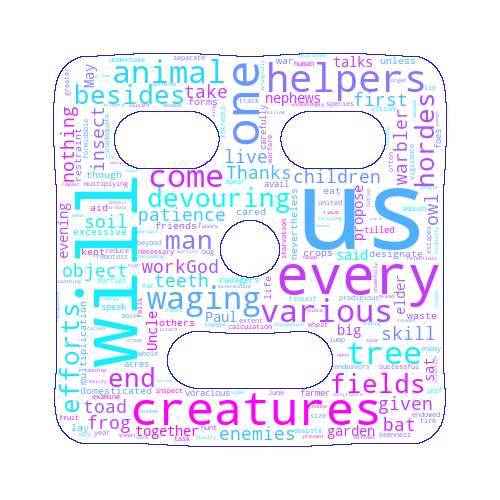

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(mask=mask, 
                      colormap='cool', 
                      background_color='white', 
                      contour_width=1, 
                      contour_color='#2222cc')
wordcloud.generate(TEXT).to_image()